In [49]:
from gptplay import utils


In [50]:
log_filepath = r"~/out_dir/grokking/sead_search_v2_min_code_xformer_kv_nobias.txt"
#log_filepath = r"D:\Dropbox\out_dir\grokking\magic8_seed_search.txt"
#log_filepath = r"D:\Dropbox\out_dir\grokking\seed_search_wd0_magic8.txt"




In [51]:
with open(utils.full_path(log_filepath), 'r') as f:
    lines = f.readlines()

logs = []
for line in lines:
    if 'val/acc=' not in line:
        continue
    columns = line.split('[INFO] ')[1].split(',')
    log = {}
    for column in columns:
        if '=' in column:
            key, val = tuple(column.split('='))
            val = val.strip()
            if val.isnumeric():
                val = int(val)
            else:
                try:
                    val = float(val)
                except ValueError:
                    pass
            log[key.strip()] = val
    logs.append(log)
    
print('Number of logs: {}'.format(len(logs)))
print('Example log: {}'.format(logs[0]))

Number of logs: 119
Example log: {'seed': 16430, 'train/step': 2999, 'train/loss': 0.1039, 'train/ppl': 1.11, 'train/acc': 0.9811, 'val/loss': 10.76, 'val/ppl': 47100.0, 'val/acc': 0.01555, 'w_norm': 64.93, 'lr': 0.001}


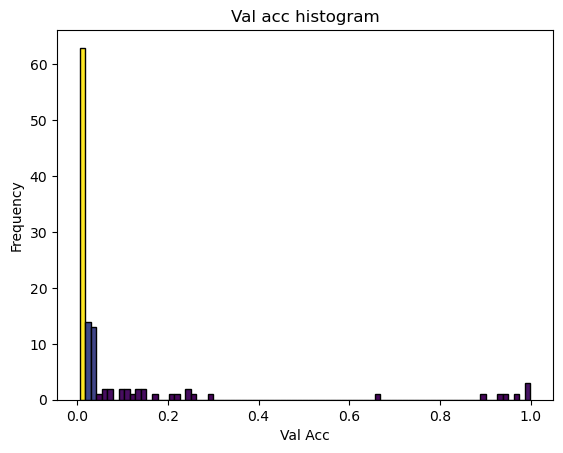

In [52]:
utils.draw_histogram([log['val/acc'] for log in logs if log['val/acc'] > 0], 'Val Acc', 'Frequency', 'Val acc histogram')

In [53]:
good_seeds = [log['seed'] for log in logs if log['val/acc'] > 0.98]
print([(bin(g),g) for g in good_seeds])
print('Number of good seeds: {}'.format(len(good_seeds)))
print('% of good seeds: {}%'.format(len(good_seeds) * 100.0 / len(logs)))

[('0b110100010100000', 26784), ('0b11101001110111', 14967), ('0b111100000110', 3846)]
Number of good seeds: 3
% of good seeds: 2.5210084033613445%


In [54]:
normal_seeds = [log['seed'] for log in logs if log['val/acc'] < 0.25]
print('Number of normal seeds: {}'.format(len(normal_seeds)))
print('% of normal_seeds seeds: {}%'.format(len(normal_seeds) * 100.0 / len(logs)))

Number of normal seeds: 109
% of normal_seeds seeds: 91.59663865546219%


In [55]:
import numpy as np
import torch

def get_stats(nums):
    if isinstance(nums, torch.Tensor):
        nums = nums.detach().cpu().numpy()
    if isinstance(nums, list):
        nums = np.array(nums)
    nums = np.array(nums)
    return {'mean': np.mean(nums),
            'median': np.median(nums),
            'std': np.std(nums),
            'min': np.min(nums),
            'max': np.max(nums),
            'n': len(nums)}


print('Training stats:')
print(get_stats([log['train/acc'] for log in logs]))

print('Validation stats:')
print(get_stats([log['val/acc'] for log in logs]))

Training stats:
{'mean': 0.9841512605042017, 'median': 0.9845, 'std': 0.00956385760876379, 'min': 0.9597, 'max': 1.0, 'n': 119}
Validation stats:
{'mean': 0.10004353781512602, 'median': 0.01608, 'std': 0.23013332941126208, 'min': 0.005696, 'max': 0.9991, 'n': 119}


In [56]:
train_stats, val_stats = [], []
for i in range(2, len(logs)):
    ts = get_stats([log['train/acc'] for log in logs[:i]])
    vs = get_stats([log['val/acc'] for log in logs[:i]])
    train_stats.append(ts)
    val_stats.append(vs)

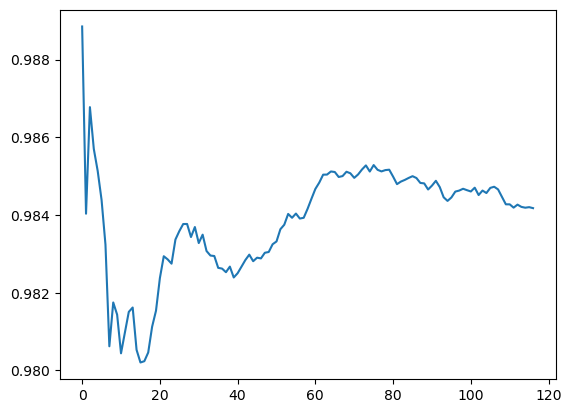

In [57]:
import matplotlib.pyplot as plt
plt.plot([ts['mean'] for ts in train_stats], label='train')

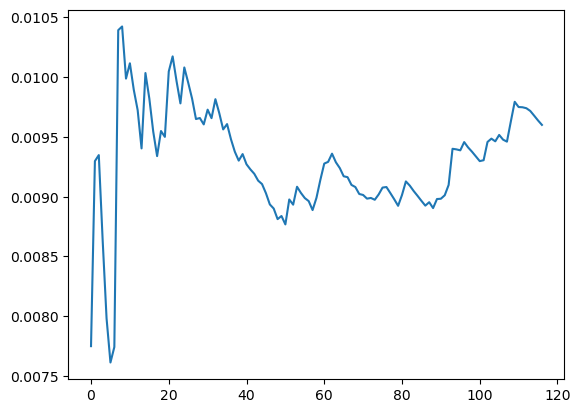

In [58]:
import matplotlib.pyplot as plt
plt.plot([ts['std'] for ts in train_stats], label='train')

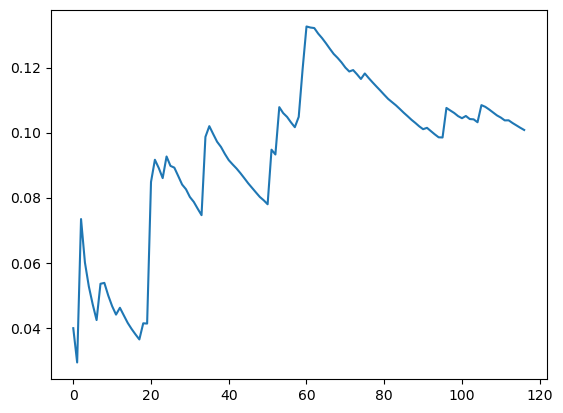

In [59]:
import matplotlib.pyplot as plt
plt.plot([ts['mean'] for ts in val_stats], label='val')

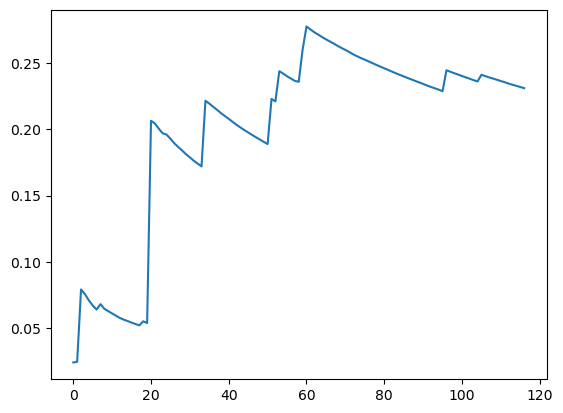

In [60]:
import matplotlib.pyplot as plt
plt.plot([ts['std'] for ts in val_stats], label='train')